In [1]:
import numpy as np
import math
from ase import Atoms
from ase.dft.kpoints import monkhorst_pack
from ase.dft.kpoints import bandpath
import sys
sys.path.append("..")
from fireballpy import Fireball

a = 5.46
atoms = Atoms(symbols=['Si', 'Si'],
        positions=[( 0.0000, 0.0000, 0.0000),
                       (    a/4,    a/4,    a/4)])  
atoms.set_cell([(0,a/2, a/2), (a/2, 0, a/2), (a/2, a/2,0)])
        
charges=np.array([[1.3963999 , 2.47211926, 0.13149041],
                  [1.39639524, 2.47208974, 0.13150545]])

In [5]:
path = 'WLGXWK'
npoints = 180
B = bandpath(path=path, cell=atoms.cell, npoints=npoints)
kpoints=B.kpts

In [6]:
atoms.calc = Fireball(charges_method='mdp',kpts=kpoints,
                     shell_charges=charges, ifixcharge=1)
atoms.get_potential_energy()

-209.72890057076472

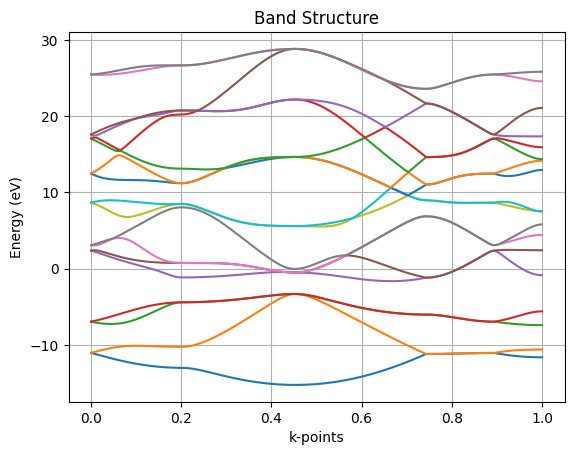

In [7]:
import matplotlib.pyplot as plt
X = np.linspace(0, 1, atoms.calc.energies.shape[0])

for band in range(atoms.calc.energies.shape[1]):
    plt.plot(X, atoms.calc.energies[:, band])
        
plt.xlabel('k-points')
plt.ylabel('Energy (eV)')
plt.title('Band Structure')
plt.grid(True)
plt.show()

<Axes: ylabel='energies [eV]'>

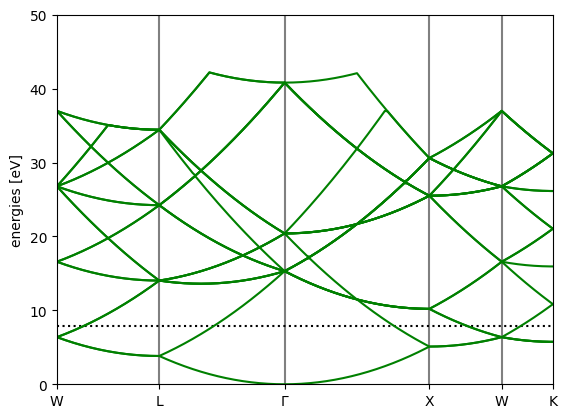

In [8]:
# creates: cu.png
from ase.build import bulk
from ase.calculators.test import FreeElectrons

a = bulk('Si')

a.calc = FreeElectrons(nvalence=4,kpts={'path': path, 'npoints': npoints})
a.get_potential_energy()
bs = a.calc.band_structure()
bs.plot(emin=0, emax=50)
